In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [19]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [20]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

629

In [21]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [22]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

 
#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | quatre cocos
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | praia da vitoria
Processing Record 6 of Set 1 | vao
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | the valley
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | olginskaya
Processing Record 14 of Set 1 | sawakin
Processing Record 15 of Set 1 | kawalu
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | lolua
City not found. Skipping...
Processing Record 18 of Set 1 | novyy urengoy
Processing Record 19 of Set 1 | krasnoselkup
Processing Record 20 of Set 1 | bambous virieux
Processin

Processing Record 35 of Set 4 | muravlenko
Processing Record 36 of Set 4 | bakaly
Processing Record 37 of Set 4 | mackay
Processing Record 38 of Set 4 | lebu
Processing Record 39 of Set 4 | morgan city
Processing Record 40 of Set 4 | nuuk
Processing Record 41 of Set 4 | moose factory
Processing Record 42 of Set 4 | luwuk
Processing Record 43 of Set 4 | litoral del san juan
City not found. Skipping...
Processing Record 44 of Set 4 | kerouane
Processing Record 45 of Set 4 | cockburn town
Processing Record 46 of Set 4 | necochea
Processing Record 47 of Set 4 | great yarmouth
Processing Record 48 of Set 4 | lazaro cardenas
Processing Record 49 of Set 4 | atar
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | chokurdakh
Processing Record 2 of Set 5 | alugan
Processing Record 3 of Set 5 | meyungs
City not found. Skipping...
Processing Record 4 of Set 5 | oranjemund
Processing Record 5 of Set 5 | caraballeda
Processing Record 6 of Set 5 | kushima
Processing Record 7 of Set

City not found. Skipping...
Processing Record 27 of Set 8 | banepa
Processing Record 28 of Set 8 | sitka
Processing Record 29 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 30 of Set 8 | thompson
Processing Record 31 of Set 8 | iquitos
Processing Record 32 of Set 8 | humaita
Processing Record 33 of Set 8 | alta floresta
Processing Record 34 of Set 8 | shimoda
Processing Record 35 of Set 8 | palu
Processing Record 36 of Set 8 | kununurra
Processing Record 37 of Set 8 | presidencia roque saenz pena
Processing Record 38 of Set 8 | tasiilaq
Processing Record 39 of Set 8 | oudtshoorn
Processing Record 40 of Set 8 | yaan
Processing Record 41 of Set 8 | mildura
Processing Record 42 of Set 8 | krasnik
Processing Record 43 of Set 8 | shirokiy
Processing Record 44 of Set 8 | pingdingshan
Processing Record 45 of Set 8 | zaliztsi
Processing Record 46 of Set 8 | faya
Processing Record 47 of Set 8 | hirara
Processing Record 48 of Set 8 | nikolskoye
Processing Record 49 of Set

Processing Record 14 of Set 12 | borba
Processing Record 15 of Set 12 | tallahassee
Processing Record 16 of Set 12 | inhambane
Processing Record 17 of Set 12 | cairo
Processing Record 18 of Set 12 | bitung
Processing Record 19 of Set 12 | brae
Processing Record 20 of Set 12 | marapanim
Processing Record 21 of Set 12 | botwood
Processing Record 22 of Set 12 | husavik
Processing Record 23 of Set 12 | saint george
Processing Record 24 of Set 12 | margate
Processing Record 25 of Set 12 | jackson
Processing Record 26 of Set 12 | batticaloa
Processing Record 27 of Set 12 | dossor
Processing Record 28 of Set 12 | nome
Processing Record 29 of Set 12 | talavera
Processing Record 30 of Set 12 | shihezi
Processing Record 31 of Set 12 | george town
Processing Record 32 of Set 12 | kalemie
Processing Record 33 of Set 12 | prainha
Processing Record 34 of Set 12 | tezu
Processing Record 35 of Set 12 | egvekinot
Processing Record 36 of Set 12 | sarvar
Processing Record 37 of Set 12 | revda
Processing 

In [30]:
len(city_data)

578

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,83.35,73,84,12.86,MV,2021-06-06 04:51:36
1,Quatre Cocos,-20.2078,57.7625,78.10,75,45,0.83,MU,2021-06-06 04:51:37
2,Pevek,69.7008,170.3133,49.33,59,86,9.01,RU,2021-06-06 04:51:37
3,East London,-33.0153,27.9116,54.54,62,0,8.05,ZA,2021-06-06 04:49:24
4,Praia Da Vitoria,38.7333,-27.0667,62.76,88,40,4.25,PT,2021-06-06 04:51:37
5,Vao,-22.6667,167.4833,71.38,67,67,20.62,NC,2021-06-06 04:51:38
6,Castro,-24.7911,-50.0119,57.49,74,58,2.21,BR,2021-06-06 04:51:38
7,The Valley,18.2170,-63.0578,80.46,75,100,19.37,AI,2021-06-06 04:47:32
8,Albany,42.6001,-73.9662,70.92,79,44,4.81,US,2021-06-06 04:51:38
9,Sao Filipe,14.8961,-24.4956,76.12,69,86,10.40,CV,2021-06-06 04:51:39


In [25]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2021-06-06 04:51:36,-0.6000,73.0833,83.35,73,84,12.86
1,Quatre Cocos,MU,2021-06-06 04:51:37,-20.2078,57.7625,78.10,75,45,0.83
2,Pevek,RU,2021-06-06 04:51:37,69.7008,170.3133,49.33,59,86,9.01
3,East London,ZA,2021-06-06 04:49:24,-33.0153,27.9116,54.54,62,0,8.05
4,Praia Da Vitoria,PT,2021-06-06 04:51:37,38.7333,-27.0667,62.76,88,40,4.25
5,Vao,NC,2021-06-06 04:51:38,-22.6667,167.4833,71.38,67,67,20.62
6,Castro,BR,2021-06-06 04:51:38,-24.7911,-50.0119,57.49,74,58,2.21
7,The Valley,AI,2021-06-06 04:47:32,18.2170,-63.0578,80.46,75,100,19.37
8,Albany,US,2021-06-06 04:51:38,42.6001,-73.9662,70.92,79,44,4.81
9,Sao Filipe,CV,2021-06-06 04:51:39,14.8961,-24.4956,76.12,69,86,10.40


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'06/06/21'

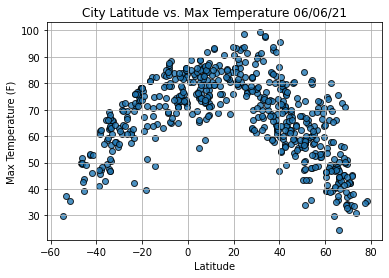

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

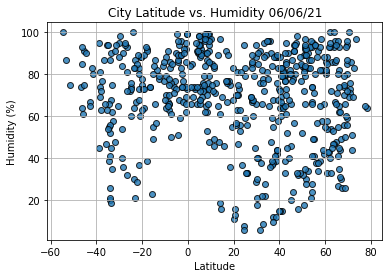

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

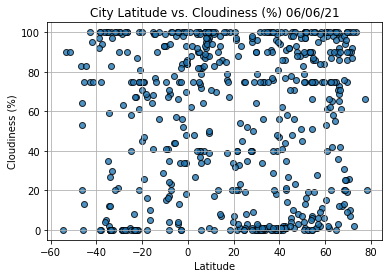

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()